# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

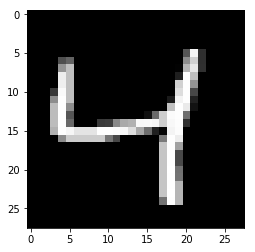

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None,784])
targets_ = tf.placeholder(tf.float32, shape=[None,784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6942
Epoch: 1/20... Training loss: 0.6910
Epoch: 1/20... Training loss: 0.6879
Epoch: 1/20... Training loss: 0.6841
Epoch: 1/20... Training loss: 0.6798
Epoch: 1/20... Training loss: 0.6746
Epoch: 1/20... Training loss: 0.6679
Epoch: 1/20... Training loss: 0.6600
Epoch: 1/20... Training loss: 0.6507
Epoch: 1/20... Training loss: 0.6397
Epoch: 1/20... Training loss: 0.6276
Epoch: 1/20... Training loss: 0.6131
Epoch: 1/20... Training loss: 0.5994
Epoch: 1/20... Training loss: 0.5823
Epoch: 1/20... Training loss: 0.5650
Epoch: 1/20... Training loss: 0.5455
Epoch: 1/20... Training loss: 0.5278
Epoch: 1/20... Training loss: 0.5162
Epoch: 1/20... Training loss: 0.4924
Epoch: 1/20... Training loss: 0.4739
Epoch: 1/20... Training loss: 0.4578
Epoch: 1/20... Training loss: 0.4382
Epoch: 1/20... Training loss: 0.4249
Epoch: 1/20... Training loss: 0.4081
Epoch: 1/20... Training loss: 0.3927
Epoch: 1/20... Training loss: 0.3880
Epoch: 1/20... Training loss: 0.3743
E

Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1991
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.2043
Epoch: 1/20... Training loss: 0.1989
Epoch: 1/20... Training loss: 0.2028
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.2018
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.2012
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1984
Epoch: 1/20... Training loss: 0.1984
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1983
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1954
E

Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1614
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1666
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1638
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1628
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1624
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1575
E

Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1363
E

Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1210
E

Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1100
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1182
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1164
E

Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1039
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1035
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1064
E

Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1017
E

Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0965
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1018
E

Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1035
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0970
E

Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0931
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0984
E

Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0920
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0960
E

Epoch: 10/20... Training loss: 0.0910
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0908
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0991
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0999
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0994
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0983
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0987
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0999
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0945


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

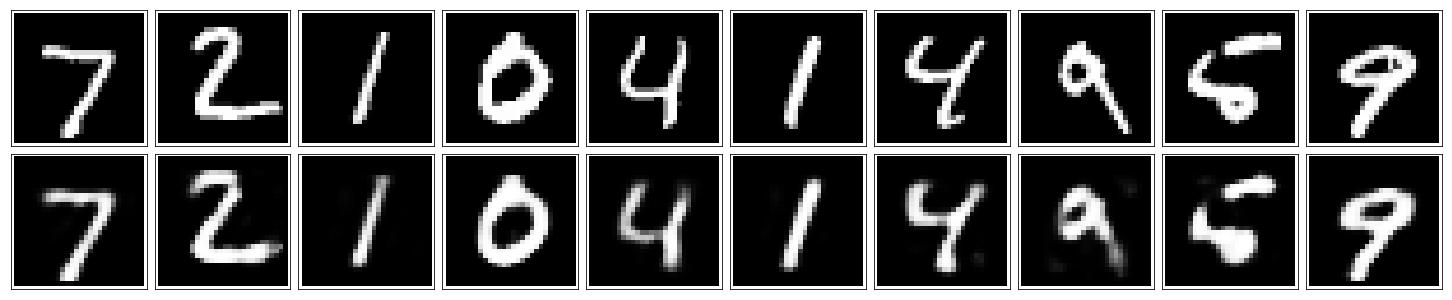

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.